In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("output2.csv",usecols=[1])
df = df.iloc[:400,:]
df = df.clip(lower=0)
df

,Plasma_current
0,0.0000
1,1.3591
2,5.7585
3,11.6940
4,17.8730
...,...
395,0.0000
396,0.0000
397,0.0000
398,0.0000


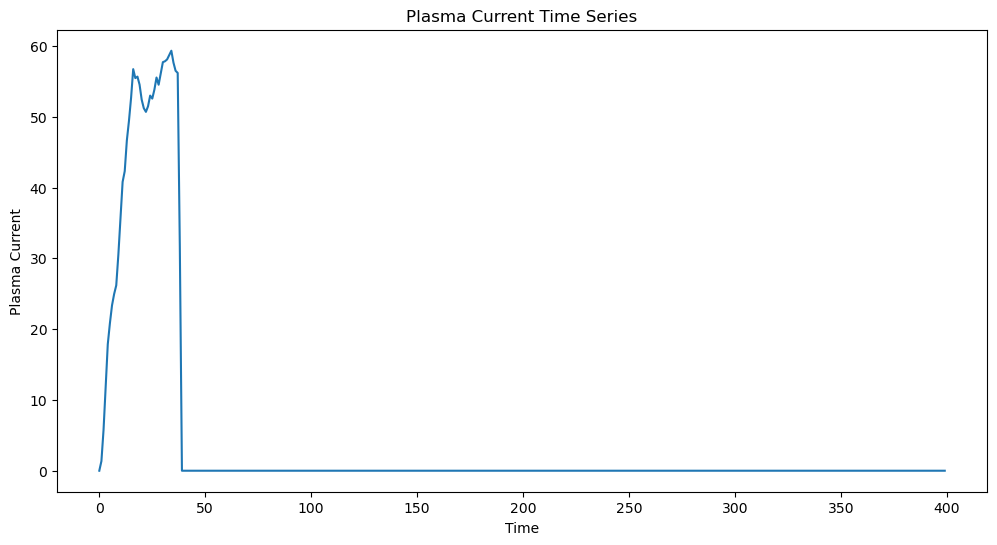

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(df['Plasma_current'])
plt.title('Plasma Current Time Series')
plt.xlabel('Time')
plt.ylabel('Plasma Current')
plt.show()

In [4]:
dataset = df.values

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In [6]:
def create_sequences(dataset,n_steps):
    X,y = [],[]
    for i in range(len(dataset)-n_steps):
        window = dataset[i:i+n_steps]
        X.append(window)
        y.append(dataset[i+n_steps])
    return np.array(X), np.array(y)

In [7]:
n_steps = 10

X,y = create_sequences(dataset,n_steps)
X = X[:30]
y = y[:30]
X

array([[[0.        ],
        [0.02290824],
        [0.0970621 ],
        [0.19710761],
        [0.30125742],
        [0.35087985],
        [0.39367584],
        [0.42066141],
        [0.44139361],
        [0.51473166]],

       [[0.02290824],
        [0.0970621 ],
        [0.19710761],
        [0.30125742],
        [0.35087985],
        [0.39367584],
        [0.42066141],
        [0.44139361],
        [0.51473166],
        [0.60224515]],

       [[0.0970621 ],
        [0.19710761],
        [0.30125742],
        [0.35087985],
        [0.39367584],
        [0.42066141],
        [0.44139361],
        [0.51473166],
        [0.60224515],
        [0.68756742]],

       [[0.19710761],
        [0.30125742],
        [0.35087985],
        [0.39367584],
        [0.42066141],
        [0.44139361],
        [0.51473166],
        [0.60224515],
        [0.68756742],
        [0.7131877 ]],

       [[0.30125742],
        [0.35087985],
        [0.39367584],
        [0.42066141],
        [0.44139361],
  

In [8]:
test_size = 0.8
split_index = int(test_size*len(X))

X_train,X_test = X[:split_index], X[split_index:]
y_train, y_test =  y[:split_index], y[split_index:]

In [9]:
y_test

array([[1.        ],
       [0.97164914],
       [0.95228223],
       [0.94710761],
       [0.53381203],
       [0.        ]])

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 10, 1)
(6, 10, 1)
(24, 1)
(6, 1)


In [11]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [12]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', input_shape=(n_steps,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.fit(X_train,y_train,validation_data=(X_test, y_test), epochs=100)

Epoch 1/100

1/1 [==============================] - 1s 1s/step - loss: 0.7180 - val_loss: 0.5863
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: 0.6972 - val_loss: 0.5668
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 0.6767 - val_loss: 0.5477
Epoch 4/100
1/1 [==============================] - 0s 29ms/step - loss: 0.6561 - val_loss: 0.5290
Epoch 5/100
1/1 [==============================] - 0s 35ms/step - loss: 0.6356 - val_loss: 0.5100
Epoch 6/100
1/1 [==============================] - 0s 30ms/step - loss: 0.6146 - val_loss: 0.4905
Epoch 7/100
1/1 [==============================] - 0s 31ms/step - loss: 0.5935 - val_loss: 0.4713
Epoch 8/100
1/1 [==============================] - 0s 27ms/step - loss: 0.5728 - val_loss: 0.4527
Epoch 9/100
1/1 [==============================] - 0s 27ms/step - loss: 0.5527 - val_loss: 0.4356
Epoch 10/100
1/1 [==============================] - 0s 28ms/step - loss: 0.5337 - val_loss: 0.4189
Epoch 11/100
1/1 [==

1/1 [==============================] - 0s 26ms/step - loss: 0.0109 - val_loss: 0.2187
Epoch 82/100
1/1 [==============================] - 0s 31ms/step - loss: 0.0107 - val_loss: 0.2153
Epoch 83/100
1/1 [==============================] - 0s 28ms/step - loss: 0.0104 - val_loss: 0.2121
Epoch 84/100
1/1 [==============================] - 0s 30ms/step - loss: 0.0102 - val_loss: 0.2093
Epoch 85/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0101 - val_loss: 0.2070
Epoch 86/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0099 - val_loss: 0.2051
Epoch 87/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0098 - val_loss: 0.2037
Epoch 88/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0096 - val_loss: 0.2027
Epoch 89/100
1/1 [==============================] - 0s 28ms/step - loss: 0.0094 - val_loss: 0.2024
Epoch 90/100
1/1 [==============================] - 0s 27ms/step - loss: 0.0093 - val_loss: 0.2024
Epoch 91/100
1/1 [=====

In [15]:
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

1/1 [==============================] - 0s 21ms/step - loss: 0.2038
Test Loss: 0.20378737151622772


In [16]:
testPredict  = model.predict(X_test)

1/1 [==============================] - 0s 151ms/step


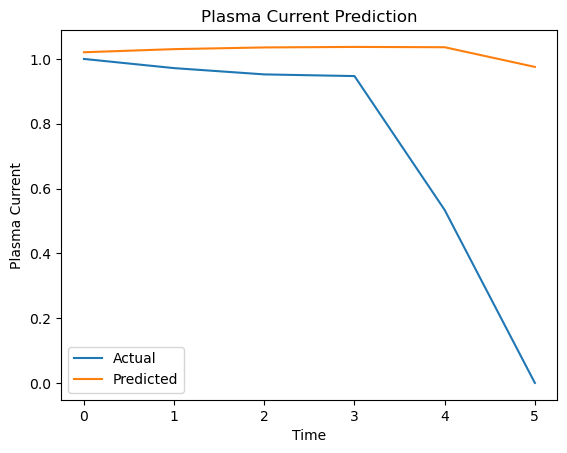

In [17]:
# plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(testPredict, label='Predicted')
plt.title('Plasma Current Prediction')
plt.xlabel('Time')
plt.ylabel('Plasma Current')
plt.legend()
plt.show()

In [18]:
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform(y_test)

In [19]:
y_test.shape,testPredict.shape

((6, 1), (6, 1))

In [20]:
from sklearn.metrics import mean_squared_error
import math 
testScore = math.sqrt(mean_squared_error(y_test, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 26.78 RMSE


In [21]:
trainPredict = model.predict(X_train)

1/1 [==============================] - 0s 17ms/step


In [22]:
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform(y_train)

In [23]:
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 5.08 RMSE


In [30]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[n_steps:len(trainPredict)+n_steps, :] = trainPredict

In [48]:
len(X)+ len(y)-9 - (len(trainPredict)+(n_steps*2)+1)

6

In [52]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(n_steps*2)+1:len(X)+ len(y)-9 , :] = testPredict

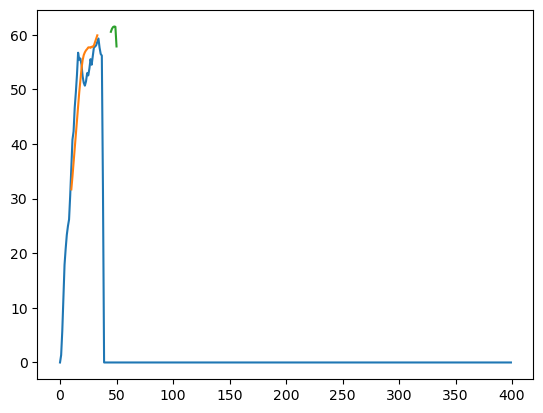

In [64]:
plt.plot(scaler.inverse_transform(dataset),label='Actual')
plt.plot(trainPredictPlot,label='TrainPredict')
plt.plot(testPredictPlot,label='testPredict')
plt.show()